In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_EU_metropolitan_areas_by_GDP'
response = requests.get(url)

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the data
table = soup.find('table', {'class': 'wikitable sortable'})

# Create a list to hold the column names
columns = []

# Extract the column names from the table header
for th in table.find_all('th'):
    columns.append(th.text.strip())

# Create a list to hold the table data
data = []

# Extract the table rows and the data from each row
for tr in table.find_all('tr')[1:]:
    row = []
    for td in tr.find_all('td'):
        row.append(td.text.strip())
    data.append(row)

# Create a dataframe from the table data and column names
eu_cities_gdp = pd.DataFrame(data, columns=columns)

# Export the dataframe to a CSV file
eu_cities_gdp.to_csv('eu_cities_gdp.csv', index=False)

# Print the dataframe
print(eu_cities_gdp)


    Rank                          Metropolitan area  \
0      1            Paris metropolitan area, France   
1      2            Madrid Metropolitan Area, Spain   
2      3        Berlin Metropolitan Region, Germany   
3      4             Milan metropolitan area, Italy   
4      5        Munich Metropolitan Region, Germany   
..   ...                                        ...   
195  196       Konstanz, metropolitan area, Germany   
196  197           Namur metropolitan area, Belgium   
197  198          Limoges metropolitan area, France   
198  199  Leeuwarden metropolitan area, Netherlands   
199  200        Kaunas metropolitan area, Lithuania   

    Gross metropolitan product (in billions EUR)[2][3]  Year  
0                                                764.8  2021  
1                                                218.5  2020  
2                                                205.1  2020  
3                                                204.5  2020  
4                       

In [40]:
# read the CSV file into a pandas dataframe
df = pd.read_csv("eu_cities_gdp.csv")

# split the Metropolitan area column into City and Country columns
df[['City', 'Country']] = df['Metropolitan area'].str.split(', ', n=1, expand=True)

# drop the Metropolitan area column
df.drop(columns=['Metropolitan area'], inplace=True)

# move the City and Country columns to the desired positions
cols = df.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-2]
df = df[cols]

# save the updated dataframe to the original CSV file
df.to_csv("eu_cities_gdp.csv", index=False, mode='w')

# print the updated dataframe
print(df)

     Rank                          City                     Country  \
0       1       Paris metropolitan area                      France   
1       2      Madrid Metropolitan Area                       Spain   
2       3    Berlin Metropolitan Region                     Germany   
3       4       Milan metropolitan area                       Italy   
4       5    Munich Metropolitan Region                     Germany   
..    ...                           ...                         ...   
195   196                      Konstanz  metropolitan area, Germany   
196   197       Namur metropolitan area                     Belgium   
197   198     Limoges metropolitan area                      France   
198   199  Leeuwarden metropolitan area                 Netherlands   
199   200      Kaunas metropolitan area                   Lithuania   

     Gross metropolitan product (in billions EUR)[2][3]  Year  
0                                                764.8   2021  
1                  

In [42]:
import pandas as pd
df = pd.read_csv("eu_cities_gdp.csv")

# fix incorrect data in rows 96 and 196
df.loc[95, 'City'] = 'Annecy metropolitan area'
df.loc[95, 'Country'] = 'France'
df.loc[195, 'City'] = 'Konstanz metropolitan area'
df.loc[195, 'Country'] = 'Germany'

# save the updated dataframe to a new CSV file
df.to_csv("eu_cities_gdp_cleaned.csv", index=False)

print (df)

     Rank                          City      Country  \
0       1       Paris metropolitan area       France   
1       2      Madrid Metropolitan Area        Spain   
2       3    Berlin Metropolitan Region      Germany   
3       4       Milan metropolitan area        Italy   
4       5    Munich Metropolitan Region      Germany   
..    ...                           ...          ...   
195   196    Konstanz metropolitan area      Germany   
196   197       Namur metropolitan area      Belgium   
197   198     Limoges metropolitan area       France   
198   199  Leeuwarden metropolitan area  Netherlands   
199   200      Kaunas metropolitan area    Lithuania   

     Gross metropolitan product (in billions EUR)[2][3]  Year  
0                                                764.8   2021  
1                                                218.5   2020  
2                                                205.1   2020  
3                                                204.5   2020  
4      

In [32]:
# group the cities by their countries
cities_by_country = df.groupby('Country')

# display the first few rows of each group
for name, group in cities_by_country:
    print(f"Country: {name}")
    display(group.head())

Country: Austria


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
16,17,130.0,2020,Vienna metropolitan area,Austria
60,61,38.4,2020,Linz metropolitan area,Austria
80,81,28.4,2020,Graz metropolitan area,Austria
128,129,20.4,2020,Salzburg metropolitan area,Austria
174,175,13.9,2020,Innsbruck metropolitan area,Austria


Country: Belgium


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
7,8,177.7,2021,Brussels Capital Region,Belgium
43,44,55.9,2021,Antwerp metropolitan area,Belgium
69,70,33.0,2021,Ghent metropolitan area,Belgium
89,90,26.3,2021,Liège metropolitan area,Belgium
178,179,13.0,2020,Charleroi metropolitan area,Belgium


Country: Bulgaria


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
79,80,28.9,2020,Sofia metropolitan area,Bulgaria
96,97,25.2,2020,Sofia,Bulgaria


Country: Croatia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
97,98,25.1,2021,Zagreb metropolitan area,Croatia


Country: Cyprus


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
100,101,24.0,2021,Nicosia metropolitan area,Cyprus


Country: Czech Republic


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
196,197,10.6,2021,Ostrava,Czech Republic


Country: Czechia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
23,24,92.3,2021,Prague metropolitan area,Czechia
91,92,26.2,2021,Brno metropolitan area,Czechia
120,121,21.2,2021,Ostrava metropolitan area,Czechia
186,187,11.6,2021,Plzeň metropolitan area,Czechia


Country: Denmark


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
13,14,152.0,2021,Greater Copenhagen,Denmark
48,49,46.4,2021,Aarhus metropolitan area,Denmark
85,86,26.9,2021,Aalborg metropolitan area,Denmark
116,117,21.4,2021,Odense metropolitan area,Denmark


Country: Estonia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
135,136,19.9,2021,Tallinn metropolitan area,Estonia


Country: Finland


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
22,23,94.2,2020,Greater Helsinki,Finland
123,124,21.0,2020,Tampere metropolitan area,Finland
140,141,19.2,2020,Turku metropolitan area,Finland


Country: France


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
0,1,764.8,2021,Paris metropolitan area,France
17,18,114.2,2021,Aix-Marseille-Provence Metropolis,France
20,21,98.4,2021,Lyon metropolitan area,France
26,27,86.1,2021,European Metropolis of Lille,France
35,36,62.4,2021,Bordeaux metropolitan area,France


Country: Germany


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
2,3,205.1,2020,Berlin Metropolitan Region,Germany
4,5,200.4,2020,Munich Metropolitan Region,Germany
8,9,169.7,2020,Ruhr Area,Germany
9,10,163.8,2020,Hamburg Metropolitan Region,Germany
14,15,151.2,2020,Frankfurt/Rhine-Main,Germany


Country: Greece


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
30,31,75.1,2020,Athens Metropolitan Area,Greece
169,170,14.4,2020,Thessaloniki metropolitan area,Greece


Country: Hungary


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
31,32,73.5,2021,Budapest metropolitan area,Hungary


Country: Ireland


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
5,6,187.6,2020,Greater Dublin Area,Ireland
18,19,103.2,2020,Metropolitan Cork,Ireland


Country: Italy


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
3,4,204.5,2020,Milan metropolitan area,Italy
12,13,153.5,2020,Rome metropolitan area,Italy
33,34,68.5,2020,Turin metropolitan area,Italy
42,43,56.3,2020,Naples metropolitan area,Italy
56,57,40.8,2020,Brescia metropolitan area,Italy


Country: Latvia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
124,125,20.9,2020,Riga metropolitan area,Latvia


Country: Lithuania


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
119,120,21.2,2020,Vilnius metropolitan area,Lithuania
199,200,10.2,2020,Kaunas metropolitan area,Lithuania


Country: Luxembourg


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
32,33,72.3,2021,Luxembourg metropolitan area,Luxembourg


Country: Malta


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
170,171,14.3,2021,Valletta metropolitan area,Malta


Country: Netherlands


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
6,7,184.4,2020,Amsterdam metropolitan area,Netherlands
25,26,86.6,2020,Rotterdam metropolitan area,Netherlands
28,29,77.0,2020,Utrecht metropolitan area,Netherlands
46,47,52.6,2020,The Hague metropolitan area,Netherlands
52,53,42.2,2020,Eindhoven metropolitan area,Netherlands


Country: Poland


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
19,20,100.3,2021,Warsaw metropolitan area,Poland
59,60,39.2,2020,Katowice metropolitan area,Poland
93,94,26.0,2020,Poznań metropolitan area,Poland
94,95,25.5,2020,Kraków metropolitan area,Poland
127,128,20.5,2020,Gdansk metropolitan area,Poland


Country: Portugal


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
29,30,76.4,2021,Lisbon metropolitan area,Portugal
67,68,34.6,2021,Porto metropolitan area metropolitan area,Portugal


Country: Romania


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
36,37,61.0,2020,Bucharest Metropolitan Area,Romania
188,189,11.5,2020,Cluj-Napoca metropolitan area,Romania


Country: Slovakia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
82,83,28.0,2021,Bratislava metropolitan area,Slovakia
184,185,12.0,2021,Košice metropolitan Area,Slovakia


Country: Slovenia


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
129,130,20.2,2021,Ljubljana metropolitan area,Slovenia


Country: Spain


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
1,2,218.5,2020,Madrid Metropolitan Area,Spain
10,11,159.8,2020,Barcelona metropolitan area,Spain
40,41,56.4,2020,Valencia metropolitan area,Spain
63,64,36.8,2020,Seville metropolitan area,Spain
68,69,34.0,2020,Alicante metropolitan area,Spain


Country: Sweden


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
11,12,154.0,2020,Stockholm metropolitan area,Sweden
27,28,79.1,2020,Gothenburg metropolitan area,Sweden
41,42,56.4,2019,Malmö metropolitan area,Sweden
148,149,16.8,2020,Uppsala metropolitan area,Sweden


Country: metropolitan area, France


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
95,96,25.3,2021,Annecy,"metropolitan area, France"


Country: metropolitan area, Germany


,Rank,Gross metropolitan product (in billions EUR)[2][3],Year,City,Country
195,196,10.7,2020,Konstanz,"metropolitan area, Germany"


In [44]:
import pandas as pd

# read the CSV file into a pandas dataframe
df = pd.read_csv("eu_cities_gdp_cleaned.csv")

# group the data by countries and calculate the total GDP
country_gdp = df.groupby('Country')['Gross metropolitan product (in billions EUR)[2][3]'].sum().reset_index()

# rename the columns
country_gdp.columns = ['Country', 'Total GDP']

# print the new table
print(country_gdp)

        Country  Total GDP
0       Austria      231.1
1       Belgium      316.5
2      Bulgaria       28.9
3       Croatia       25.1
4        Cyprus       24.0
5       Czechia      151.3
6       Denmark      246.7
7       Estonia       19.9
8       Finland      134.4
9        France     1899.5
10      Germany     2372.8
11       Greece       89.5
12      Hungary       73.5
13      Ireland      290.8
14        Italy      886.1
15       Latvia       20.9
16    Lithuania       31.4
17   Luxembourg       72.3
18        Malta       14.3
19  Netherlands      605.9
20       Poland      254.4
21     Portugal      111.0
22      Romania       72.5
23     Slovakia       40.0
24     Slovenia       20.2
25        Spain      870.1
26       Sweden      306.3


    Rank      Country  Gross metropolitan product (in billions EUR)[2][3]
0     11      Austria                                              231.1 
1      6      Belgium                                              316.5 
2     21     Bulgaria                                               28.9 
3     22      Croatia                                               25.1 
4     23       Cyprus                                               24.0 
5     12      Czechia                                              151.3 
6     10      Denmark                                              246.7 
7     26      Estonia                                               19.9 
8     13      Finland                                              134.4 
9      2       France                                             1899.5 
10     1      Germany                                             2372.8 
11    15       Greece                                               89.5 
12    16      Hungary                 

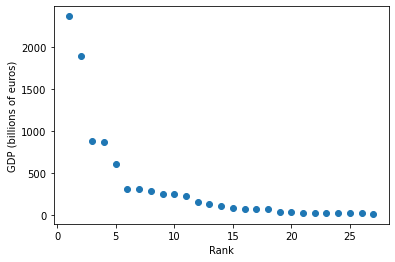

In [47]:
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv("eu_cities_gdp_cleaned.csv")

# Group by country and calculate the total GDP
country_gdp = df.groupby('Country')['Gross metropolitan product (in billions EUR)[2][3]'].sum().reset_index()

# Rank the countries by their GDP
country_gdp['Rank'] = country_gdp['Gross metropolitan product (in billions EUR)[2][3]'].rank(ascending=False).astype(int)

# Print the table of countries and their total GDP
print(country_gdp[['Rank', 'Country', 'Gross metropolitan product (in billions EUR)[2][3]']])

# Create a scatter plot of GDP vs. Rank
plt.scatter(country_gdp['Rank'], country_gdp['Gross metropolitan product (in billions EUR)[2][3]'])
plt.xlabel('Rank')
plt.ylabel('GDP (billions of euros)')
plt.show()